https://github.com/Qiskit/qiskit

In [17]:
import qiskit
import numpy as np
from qiskit import QuantumCircuit

In [18]:
# 1. A quantum circuit for preparing the quantum state |000> + i |111>
qc_example = QuantumCircuit(3)
qc_example.h(0)          # generate superpostion
qc_example.p(np.pi/2,0)  # add quantum phase
qc_example.cx(0,1)       # 0th-qubit-Controlled-NOT gate on 1st qubit
qc_example.cx(0,2)       # 0th-qubit-Controlled-NOT gate on 2nd qubit
qc_example.draw()

┌───┐┌────────┐          
q_0: ┤ H ├┤ P(π/2) ├──■────■──
     └───┘└────────┘┌─┴─┐  │  
q_1: ───────────────┤ X ├──┼──
                    └───┘┌─┴─┐
q_2: ────────────────────┤ X ├
                         └───┘

In [19]:
# 2. define the observable to be measured 
from qiskit.quantum_info import SparsePauliOp
operator = SparsePauliOp.from_list([("XXY", 1), ("XYX", 1), ("YXX", 1), ("YYY", -1)])

# 3. Execute using the Estimator primitive
from qiskit.primitives import Estimator
estimator = qiskit.primitives.BackendEstimator(FakeManilaV2())
estimator = Estimator()

for s in range(1,101,10):
    job = estimator.run(qc_example, operator, shots=s)
    result = job.result()
    # print(s, f" > Expectation values: {result.values}")
    print(s, f" > Expectation values: {result}")

1  > Expectation values: EstimatorResult(values=array([4.00000001]), metadata=[{'variance': 3.552713678800501e-15, 'shots': 1}])
11  > Expectation values: EstimatorResult(values=array([3.99999999]), metadata=[{'variance': 3.552713678800501e-15, 'shots': 11}])
21  > Expectation values: EstimatorResult(values=array([4.00000001]), metadata=[{'variance': 3.552713678800501e-15, 'shots': 21}])
31  > Expectation values: EstimatorResult(values=array([4.00000002]), metadata=[{'variance': 3.552713678800501e-15, 'shots': 31}])
41  > Expectation values: EstimatorResult(values=array([3.99999998]), metadata=[{'variance': 3.552713678800501e-15, 'shots': 41}])
51  > Expectation values: EstimatorResult(values=array([3.99999999]), metadata=[{'variance': 3.552713678800501e-15, 'shots': 51}])
61  > Expectation values: EstimatorResult(values=array([4.]), metadata=[{'variance': 3.552713678800501e-15, 'shots': 61}])
71  > Expectation values: EstimatorResult(values=array([4.]), metadata=[{'variance': 3.552713

In [20]:
# 3. Execute using the Sampler primitive
from qiskit.primitives.sampler import Sampler

# , BackendSampler
sampler = Sampler()

job = sampler.run(qc_measured, shots=2000)
result = job.result()
print(f" > Quasi probability distribution: {result.quasi_dists}")

 > Quasi probability distribution: [{0: 0.493, 7: 0.507}]


## Sampler

In [21]:
# 2. Add the classical output in the form of measurement of all qubits
qc_measured = qc_example.measure_all(inplace=False)
qc_measured.draw()

┌───┐┌────────┐           ░ ┌─┐      
   q_0: ┤ H ├┤ P(π/2) ├──■────■───░─┤M├──────
        └───┘└────────┘┌─┴─┐  │   ░ └╥┘┌─┐   
   q_1: ───────────────┤ X ├──┼───░──╫─┤M├───
                       └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
   q_2: ────────────────────┤ X ├─░──╫──╫─┤M├
                            └───┘ ░  ║  ║ └╥┘
meas: 3/═════════════════════════════╩══╩══╩═
                                     0  1  2

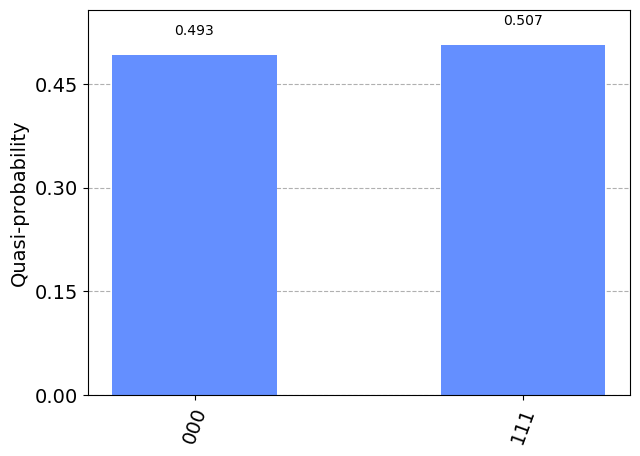

In [22]:
from qiskit.visualization import plot_histogram
statistics = result.quasi_dists[0].binary_probabilities()
display(plot_histogram(statistics))

 > Quasi probability distribution: [{1: 0.003, 4: 0.011, 6: 0.014, 5: 0.022, 2: 0.018, 0: 0.5, 3: 0.017, 7: 0.415}]


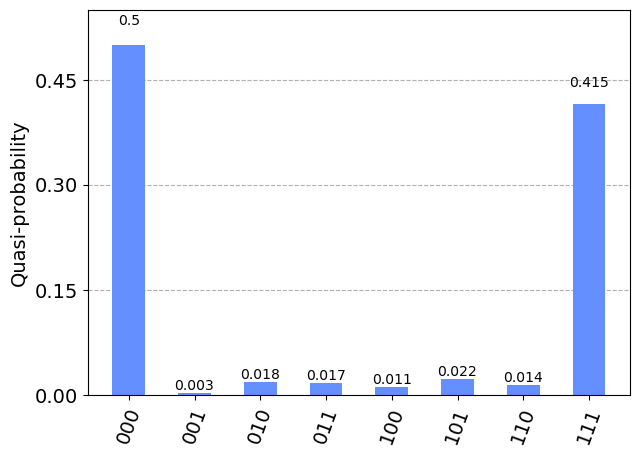

In [23]:
import qiskit.primitives
from qiskit.providers.fake_provider import *
sampler = qiskit.primitives.BackendSampler(FakeManilaV2())
# sampler = qiskit.primitives.sampler.Sampler()

job = sampler.run(qc_measured, shots=1000)
result = job.result()
print(f" > Quasi probability distribution: {result.quasi_dists}")

statistics = result.quasi_dists[0].binary_probabilities()
display(plot_histogram(statistics))

## Estimator

In [24]:
# 2. define the observable to be measured 
from qiskit.quantum_info import SparsePauliOp
operator = SparsePauliOp.from_list([("XXY", 1), ("XYX", 1), ("YXX", 1), ("YYY", -1)])

# 3. Execute using the Estimator primitive
from qiskit.primitives import Estimator
estimator = Estimator()

job = estimator.run(qc_example, operator, shots=1)
result = job.result()
print(f" > Expectation values: {result.values}")
result

job = estimator.run(qc_example, operator, shots=1000)
result = job.result()
print(f" > Expectation values: {result.values}")
result

 > Expectation values: [4.00000004]
 > Expectation values: [4.]


EstimatorResult(values=array([4.]), metadata=[{'variance': 3.552713678800501e-15, 'shots': 1000}])

In [25]:
result

EstimatorResult(values=array([4.]), metadata=[{'variance': 3.552713678800501e-15, 'shots': 1000}])

In [26]:
from qiskit.quantum_info import Operator


In [27]:
# Create a Quantum Circuit acting on a quantum register of three qubits
circ = QuantumCircuit(3)
# Add a H gate on qubit 0, putting this qubit in superposition.
circ.h(0)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circ.cx(0, 1)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
circ.cx(0, 2)
circ.draw()

U = Operator(circ)
# Show the results
U.data

array([[ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.70710678+0.j, -0.70710678+0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
         0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j, -0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j,  0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
        -0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.      

In [28]:
# Create a Quantum Circuit
meas = QuantumCircuit(3, 3)
meas.barrier(range(3))
# map the quantum measurement to the classical bits
meas.measure(range(3), range(3))

# The Qiskit circuit object supports composition.
# Here the meas has to be first and front=True (putting it before)
# as compose must put a smaller circuit into a larger one.
qc = meas.compose(circ, range(3), front=True)

#drawing the circuit
qc.draw()

# Adding the transpiler to reduce the circuit to QASM instructions
# supported by the backend
from qiskit import transpile

# Use AerSimulator
from qiskit_aer import AerSimulator

backend = AerSimulator()

# First we have to transpile the quantum circuit
# to the low-level QASM instructions used by the
# backend
qc_compiled = transpile(qc, backend)

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = backend.run(qc_compiled, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

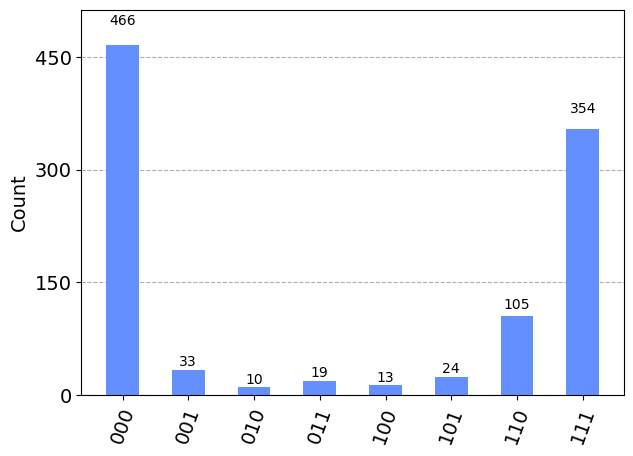

In [29]:
# from qiskit import BasicAer
# backend = BasicAer.get_backend('qasm_simulator')
# Get a fake backend from the fake provider
backend = FakeManilaV2()
# backend= FakeAuckland()
# backend = AerSimulator()


job = backend.run(circuit)
counts = job.result().get_counts()
plot_histogram(counts)

In [30]:
from qiskit import transpile
 
# Transpile the ideal circuit to a circuit that can be directly executed by the backend
transpiled_circuit = transpile(circuit, backend)
transpiled_circuit.draw()

global phase: π/4
                                                                   »
ancilla_0 -> 0 ────────────────────────────────────────────────────»
                                                                   »
ancilla_1 -> 1 ────────────────────────────────────────────────────»
                                           ┌───┐┌─────────────────┐»
      q_1 -> 2 ────────────────────────────┤ X ├┤ Delay(4800[dt]) ├»
               ┌─────────┐┌────┐┌─────────┐└─┬─┘└─────────────────┘»
      q_0 -> 3 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──■───────────■─────────»
               └─────────┘└────┘└─────────┘            ┌─┴─┐       »
      q_2 -> 4 ────────────────────────────────────────┤ X ├───────»
                                                       └───┘       »
       meas: 3/════════════════════════════════════════════════════»
                                                                   »
«                                              
«ancilla_0 -> 0 ───────────────────────────────
«                                              
«ancilla_1 -> 1 ───────────────────────────────
«                                   ░    ┌─┐   
«      q_1 -> 2 ────────────────────░────┤M├───
«               ┌─────────────────┐ ░ ┌─┐└╥┘   
«      q_0 -> 3 ┤ Delay(4800[dt]) ├─░─┤M├─╫────
«               ├─────────────────┤ ░ └╥┘ ║ ┌─┐
«      q_2 -> 4 ┤ Delay(4800[dt]) ├─░──╫──╫─┤M├
«               └─────────────────┘ ░  ║  ║ └╥┘
«       meas: 3/═══════════════════════╩══╩══╩═
«                                      0  1  2

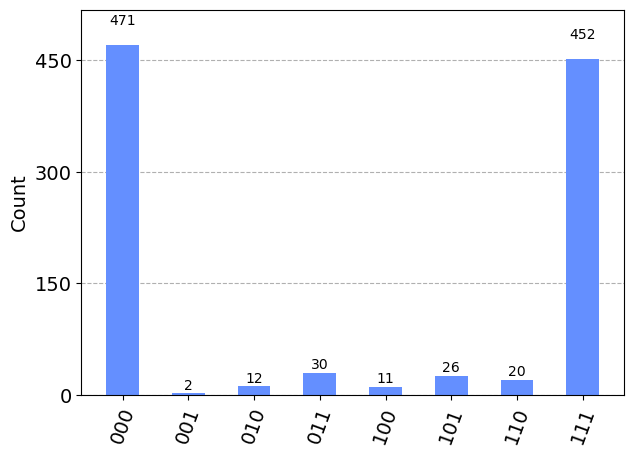

In [16]:
 
# Run the transpiled circuit using the simulated fake backend
job = backend.run(transpiled_circuit)
counts = job.result().get_counts()
plot_histogram(counts)

## AER

In [54]:
import qiskit
from qiskit_aer import AerSimulator
from qiskit.providers.fake_provider import *

# Generate 3-qubit GHZ state
circ = qiskit.QuantumCircuit(3)
circ.h(0)
circ.cx(0, 1)
circ.cx(1, 2)
circ.measure_all()

# Construct an ideal simulator
aersim = AerSimulator()

# Perform an ideal simulation
result_ideal = aersim.run(circ).result()
counts_ideal = result_ideal.get_counts(0)
print('Counts(ideal):', counts_ideal)
# Counts(ideal): {'000': 493, '111': 531}

# Construct a noisy simulator backend from an IBMQ backend
# This simulator backend will be automatically configured
# using the device configuration and noise model
backend = FakeCairo()
# aersim_backend = AerSimulator.from_backend(backend)
aersim_backend = FakeManilaV2()

# Perform noisy simulation
result_noise = aersim_backend.run(circ).result()
counts_noise = result_noise.get_counts(0)

print('Counts(noise):', counts_noise)
# Counts(noise): {'101': 16, '110': 48, '100': 7, '001': 31, '010': 7, '000': 464, '011': 15, '111': 436}

Counts(ideal): {'000': 485, '111': 539}
Counts(noise): {'001': 32, '110': 109, '100': 20, '011': 16, '111': 370, '010': 11, '000': 449, '101': 17}
